In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
train_data = pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')

In [34]:
test_data = pd.read_csv('/kaggle/input/house-price-prediction-challenge/test.csv')

In [35]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [36]:
test_data.head(12)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
5,Owner,0,0,2,BHK,500.000000,1,1,"Elora Park,Vadodara",21.716412,73.004076
6,Dealer,0,0,1,BHK,724.835886,1,1,"Shirgaon,Maharashtra",19.032025,73.621535
7,Dealer,1,1,1,BHK,778.842862,0,1,"Anjurdive,Mumbai",18.966670,72.833330
8,Dealer,0,0,1,BHK,600.055819,1,1,"Rambaug,Maharashtra",19.243817,73.134692
9,Dealer,0,0,2,BHK,1323.591698,1,1,"Borivali (West),Lalitpur",19.236100,72.833800


In [37]:
del train_data['ADDRESS'], test_data['ADDRESS']

In [38]:
train_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [39]:
cat =  ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']
num = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']
y_train = train_data.iloc[:, train_data.columns.values =='TARGET(PRICE_IN_LACS)']

In [40]:
train_data_cat = train_data[cat]
train_data_num = train_data[num]

In [41]:
train_data_cat.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,READY_TO_MOVE,RESALE
0,Owner,0,0,BHK,1,1
1,Dealer,0,0,BHK,1,1
2,Owner,0,0,BHK,1,1
3,Owner,0,1,BHK,1,1
4,Dealer,1,0,BHK,0,1


In [42]:
test_data_cat = test_data[cat]
test_data_num = test_data[num]

In [43]:
train_data_cat = pd.get_dummies(train_data_cat, drop_first=True)
test_data_cat = pd.get_dummies(test_data_cat, drop_first = True)

In [44]:
x_train = pd.concat([train_data_cat, train_data_num], axis=1)
x_test = pd.concat([test_data_cat, test_data_num], axis=1)

In [45]:
x_train.shape

(29451, 11)

In [46]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [47]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='he_uniform', activation='linear'))
model.add(Dense(7))
model.add(Dense(3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics = ['mse', 'mae', 'mape'])

In [49]:
history = model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
590/590 [==============================] - 1s 1ms/step - loss: 493693.1563 - mse: 493693.1563 - mae: 146.8138 - mape: 96.8401
Epoch 2/100
590/590 [==============================] - 1s 1ms/step - loss: 470844.0825 - mse: 470844.0825 - mae: 129.3300 - mape: 107.0891
Epoch 3/100
590/590 [==============================] - 1s 1ms/step - loss: 435732.5602 - mse: 435732.5602 - mae: 139.5480 - mape: 178.0598
Epoch 4/100
590/590 [==============================] - 1s 1ms/step - loss: 548596.9576 - mse: 548596.9576 - mae: 159.9589 - mape: 206.7854
Epoch 5/100
590/590 [==============================] - 1s 1ms/step - loss: 314200.4198 - mse: 314200.4207 - mae: 134.5963 - mape: 184.9199
Epoch 6/100
590/590 [==============================] - 1s 1ms/step - loss: 435263.8419 - mse: 435263.8429 - mae: 158.8441 - mape: 218.0823
Epoch 7/100
590/590 [==============================] - 1s 1ms/step - loss: 439365.2470 - mse: 439365.2778 - mae: 152.7788 - mape: 203.2175
Epoch 8/100
590/590 [=======

In [50]:
y_pred = model.predict(x_train)
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))

print("Results: %.2f RMSE" % (RMSE))

Results: 575.75 RMSE


In [51]:
y_pred = model.predict(x_test)

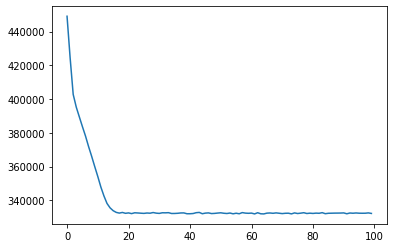

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.show()